<a href="https://colab.research.google.com/github/RamachandrapuSrija9/Plantdiseasedetection/blob/main/plantdiseasedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSTALL NECESSARY PACKAGES

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from PIL import Image
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torch.optim as optim
import torch.nn.functional as F
import colorama
from colorama import Fore, Style

In [ ]:
Root_dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = Root_dir + "/train"
valid_dir = Root_dir + "/valid"
test_dir = "/kaggle/input/new-plant-diseases-dataset/test"
Diseases_classes = os.listdir(train_dir)

How many classes are in the dataset?

In [ ]:
print(Fore.GREEN +str(Diseases_classes))
print("\nTotal number of classes are: ", len(Diseases_classes))

['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Pepper,_bell___Bacterial_spot', 'Corn_(maize)___healthy']

Total number of classes are:  38

In [ ]:
plt.figure(figsize=(60,60), dpi=200)
cnt = 0
plant_names = []
tot_images = 0

for i in Diseases_classes:
    cnt += 1
    plant_names.append(i)
    plt.subplot(7,7,cnt)

    image_path = os.listdir(train_dir + "/" + i)
    print(Fore.GREEN)
    print("The Number of Images in " +i+ ":", len(image_path), end= " ")
    tot_images += len(image_path)

    img_show = plt.imread(train_dir + "/" + i + "/" + image_path[0])

    plt.imshow(img_show)
    plt.xlabel(i,fontsize=30)
    plt.xticks([])
    plt.yticks([])


print("\nTotal Number of Images in Directory: ", tot_images)

In [ ]:
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Pepper,_bell___Bacterial_spot', 'Corn_(maize)___healthy']

The Number of Images in Tomato___Late_blight: 1851
The Number of Images in Tomato___healthy: 1926
The Number of Images in Grape___healthy: 1692
The Number of Images in Orange___Haunglongbing_(Citrus_greening): 2010
The Number of Images in Soybean___healthy: 2022
The Number of Images in Squash___Powdery_mildew: 1736
The Number of Images in Potato___healthy: 1824
The Number of Images in Corn_(maize)___Northern_Leaf_Blight: 1908
The Number of Images in Tomato___Early_blight: 1920
The Number of Images in Tomato___Septoria_leaf_spot: 1745
The Number of Images in Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 1642
The Number of Images in Strawberry___Leaf_scorch: 1774
The Number of Images in Peach___healthy: 1728
The Number of Images in Apple___Apple_scab: 2016
The Number of Images in Tomato___Tomato_Yellow_Leaf_Curl_Virus: 1961
The Number of Images in Tomato___Bacterial_spot: 1702
The Number of Images in Apple___Black_rot: 1987
The Number of Images in Blueberry___healthy: 1816
The Number of Images in Cherry_(including_sour)___Powdery_mildew: 1683
The Number of Images in Peach___Bacterial_spot: 1838
The Number of Images in Apple___Cedar_apple_rust: 1760
The Number of Images in Tomato___Target_Spot: 1827
The Number of Images in Pepper,_bell___healthy: 1988
The Number of Images in Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1722
The Number of Images in Potato___Late_blight: 1939
The Number of Images in Tomato___Tomato_mosaic_virus: 1790
The Number of Images in Strawberry___healthy: 1824
The Number of Images in Apple___healthy: 2008
The Number of Images in Grape___Black_rot: 1888
The Number of Images in Potato___Early_blight: 1939
The Number of Images in Cherry_(including_sour)___healthy: 1826
The Number of Images in Corn_(maize)___Common_rust_: 1907
The Number of Images in Grape___Esca_(Black_Measles): 1920
The Number of Images in Raspberry___healthy: 1781
The Number of Images in Tomato___Leaf_Mold: 1882
The Number of Images in Tomato___Spider_mites Two-spotted_spider_mite: 1741
The Number of Images in Pepper,_bell___Bacterial_spot: 1913
The Number of Images in Corn_(maize)___healthy: 1859
Total Number of Images in Directory:  70295


In [ ]:
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))


image_list = [0, 3000, 5000, 8000, 12000, 15000, 60000, 70000]

chs = 0
for img in image_list:
    chs += 1
    plt.subplot(2,4,chs)
    print(Fore.GREEN)
    plt.tight_layout()
    plt.xlabel(img,fontsize=10)
    plt.title(train[img][1])
    show_image(*train[img])


Label :Apple___Apple_scab(0)

Label :Apple___Black_rot(1)

Label :Apple___Cedar_apple_rust(2)

Label :Blueberry___healthy(4)

Label :Cherry_(including_sour)___healthy(6)

Label :Corn_(maize)___Common_rust_(8)

Label :Tomato___Septoria_leaf_spot(32)

Label :Tomato___healthy(37)

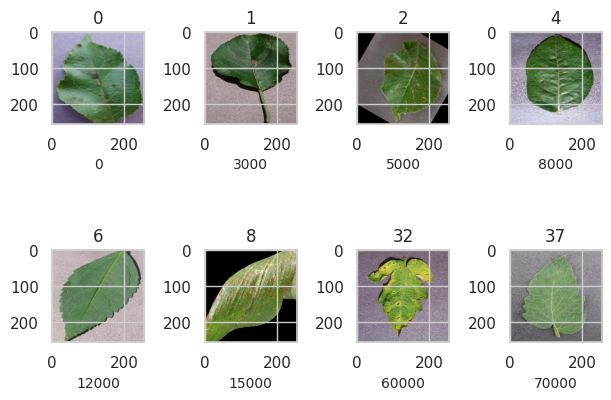